In [55]:
from prettytable import PrettyTable
import matplotlib.pyplot as plt
from asq.initiators import query
import json

project_name = 'workspace'

with open("qpi.json") as result:
    final = json.load(result)

def extract_results(node_name, section_name):
    workload_name = []
    workload_score = []
    if section_name == 'system_info':
        for node in final['nodes']:
            if node['name'] == node_name: 
                return node['system_info']
    qpi = query(final['nodes']).where(lambda child: child['name'] == node_name) \
            .select_many(lambda child: child['sections']) \
            .where(lambda child: child['name'] == section_name) \
            .select_many(lambda child: child['metrics']).to_list()

    for wl in qpi[0]['workloads']:
        workload_name.append(wl['name'])
        workload_score.append(wl['score'])

    x_axis = range(len(workload_name))

    plt.bar(x_axis, workload_score)
    plt.xticks(x_axis, workload_name, rotation=45)
    plt.xlabel('Workloads')
    plt.ylabel('Score')
    plt.title('Metric Result')
    return plt

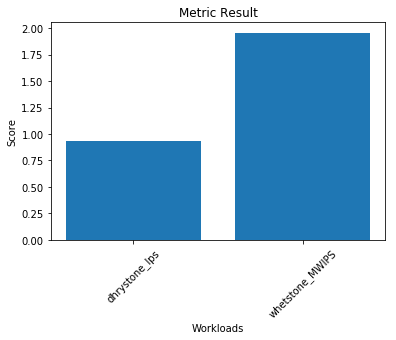

In [56]:
arith = extract_results('node-9', 'arithmetic')
plt.show()

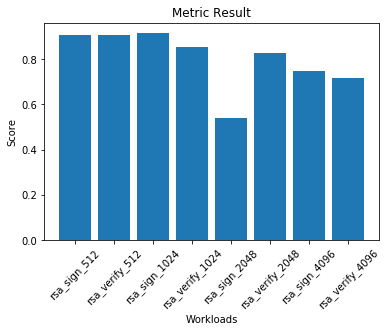

In [57]:
ssl = extract_results('node-9', 'SSL')
ssl.show()

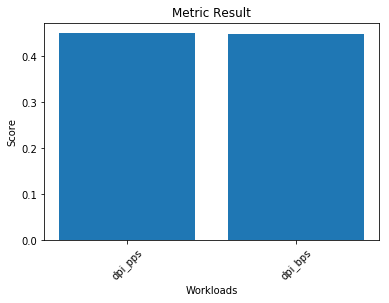

In [58]:
dpi = extract_results('node-9', 'DPI')
dpi.show()

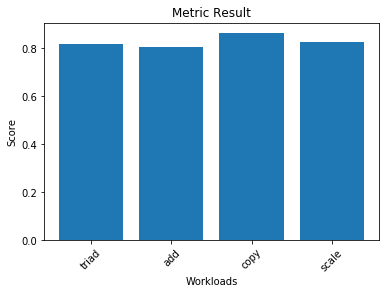

In [59]:
memory = extract_results('node-9', 'memory')
memory.show()

In [63]:
system_info = extract_results('node-9', 'system_info')
table = PrettyTable(['Component', 'Value'])
table.align = 'l'
for key,value in system_info.iteritems():
    table.add_row([key, value[0]])
print table

+-----------+---------------------+
| Parameter | Info                |
+-----------+---------------------+
| product   | KVM                 |
| disk      | 53.7GB (5.9% used)  |
| os        | Ubuntu 14.04 trusty |
| memory    | 799.5/3945.4MB      |
+-----------+---------------------+
